RMSE: 0.03545331339896308
Train_R2: 0.8128061957314202
Test_R2: -0.31506343439101914


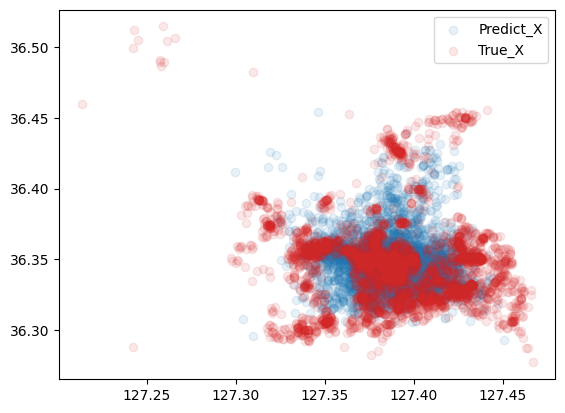

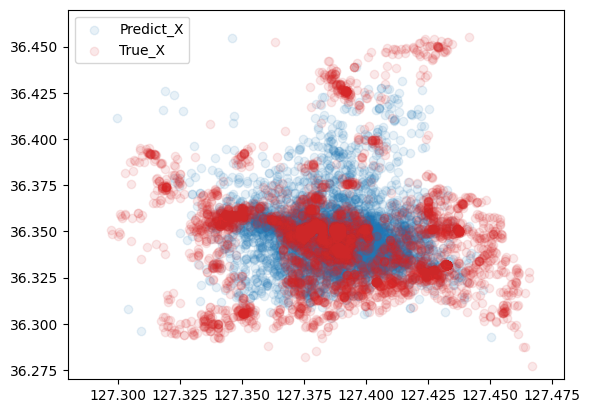

In [1]:
import pandas as pd
import numpy as np
import os

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline

taxi_data = pd.read_csv('./data/sample.csv', encoding='euc-kr')
taxi_data = taxi_data[taxi_data['승차X좌표'] != 0.0]

# 일 분리: int type
# taxi_data['일'] = taxi_data['승차시간'].apply(lambda x: int(x[8:10]))
# 시각 분리: int type
taxi_data['시각'] = taxi_data['승차시간'].apply(lambda x: int(x[11:13]+x[14:16]+x[17:])) # int 적용?
# 요일 원핫인코딩
day_encoding = pd.get_dummies(taxi_data['요일'])
day_encoding = day_encoding.astype(int)
taxi_data = taxi_data.drop('요일', axis=1)
taxi_data = taxi_data.join(day_encoding)
taxi_data = taxi_data.drop(['승차시간', '차량번호'], axis=1)


# 학습, 테스트 데이터 분리
X = taxi_data[taxi_data.columns.difference(['승차X좌표', '승차Y좌표'])]
y = taxi_data[['승차X좌표', '승차Y좌표']]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)

# 랜덤 포레스트 모델 학습
model = RandomForestRegressor(random_state=42)
model.fit(train_X, train_y)

# 모델 평가
test_y_pred = model.predict(test_X)
mse = mean_squared_error(test_y, test_y_pred)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')
print("Train_R2:", model.score(train_X, train_y))
print("Test_R2:", model.score(test_X, test_y))

# 그래프
test_y_pred = pd.DataFrame(test_y_pred, columns=['예측승차X좌표', '예측승차Y좌표'])

plt.scatter(test_y_pred['예측승차X좌표'], test_y_pred['예측승차Y좌표'], linestyle='solid', color='C0', alpha=0.1, label='Predict_X')
plt.scatter(test_y['승차X좌표'], test_y['승차Y좌표'], linestyle='solid', color='C3', alpha=0.1, label='True_X')
plt.legend()
plt.show()

plt.axis([127.28, 127.48, 36.27, 36.47])
plt.scatter(test_y_pred['예측승차X좌표'], test_y_pred['예측승차Y좌표'], linestyle='solid', color='C0', alpha=0.1, label='Predict_X')
plt.scatter(test_y['승차X좌표'], test_y['승차Y좌표'], linestyle='solid', color='C3', alpha=0.1, label='True_X')
plt.legend()
plt.show()

In [2]:
taxi_data.head()

,승차X좌표,승차Y좌표,시각,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,127.378452,36.298087,125,0,0,1,0,0,0,0
1,127.384640,36.297051,513,0,0,1,0,0,0,0
2,127.369007,36.329850,1724,0,0,1,0,0,0,0
3,127.377270,36.351743,2500,0,0,1,0,0,0,0
4,127.395335,36.376610,4232,0,0,1,0,0,0,0
